In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [6]:
Y=tf.keras.utils.to_categorical(train_labels)

# Model Create :



In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28 )),
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile model 

In [8]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [10]:
model.compile(optimizer=optimizer,
              loss=loss_fn,metrics=["accuracy",'MeanSquaredError',"AUC",keras.metrics.Precision(), keras.metrics.Recall()])

In [11]:
displayfig=model.fit(train_images, Y, epochs=30,shuffle = True)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5114 - accuracy: 0.8200 - mean_squared_error: 0.0257 - auc: 0.9840 - precision: 0.8699 - recall: 0.7640
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8624 - mean_squared_error: 0.0196 - auc: 0.9903 - precision: 0.8916 - recall: 0.8347
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3443 - accuracy: 0.8749 - mean_squared_error: 0.0179 - auc: 0.9920 - precision: 0.9005 - recall: 0.8511
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3192 - accuracy: 0.8823 - mean_squared_error: 0.0168 - auc: 0.9931 - precision: 0.9050 - recall: 0.8611
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.8879 - mean_squared_error: 0.0160 - auc: 0.9936 - precision: 0.9088 - recall: 0.8693: 1s - loss: 0.3017 - accuracy: 0.8890 - mean_squared_error: 0.0159 
Epoch 6/30
1875/1875 [

In [12]:
Ytest=tf.keras.utils.to_categorical(test_labels)

# Performance indicators

In [13]:
test_loss, test_acc, test_mean, test_auc, test_prec, test_recall = model.evaluate(test_images,  Ytest, verbose=6)

print('\nTest accuracy:', test_acc)
print('\nTest mean:', test_mean)
print('\nTest AUC:', test_auc)
print('\nTest precision:', test_prec)
print('\nTest recall:', test_recall)


Test accuracy: 0.8845999836921692

Test mean: 0.017502527683973312

Test AUC: 0.9857016801834106

Test precision: 0.8943403959274292

Test recall: 0.878600001335144


In [14]:
y_pred=np.argmax(model.predict(test_images), axis=-1)
conf=tf.math.confusion_matrix(
    test_labels, y_pred, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

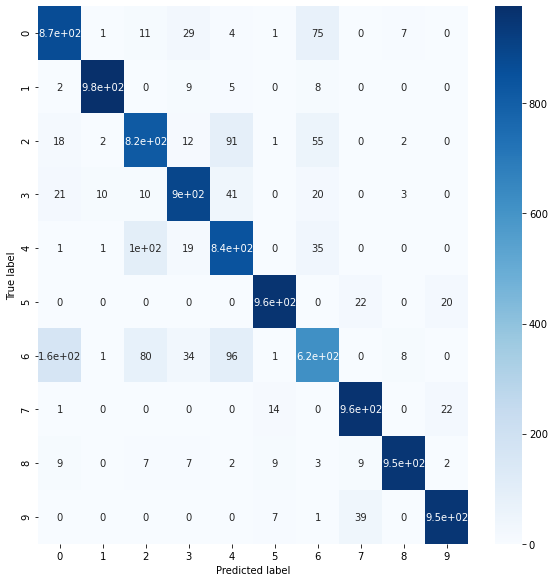

In [15]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

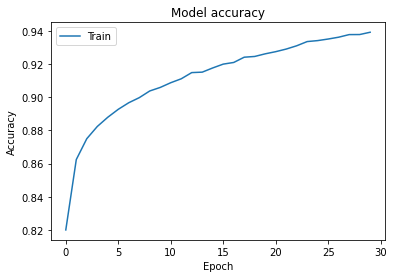

In [16]:
plt.plot(displayfig.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.title('Model accuracy')

plt.show()

#  Model Predict

In [17]:
j=model.predict(test_images)

label predit :  3
label name predit :  Dress
label :  3
label name :  Dress


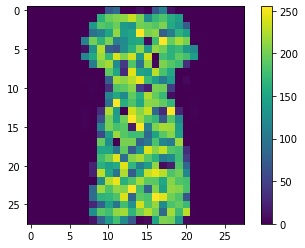

In [22]:
i=2345

print("label predit : ",np.argmax(j[i]))
print("label name predit : ",class_names[np.argmax(j[i])])
print("label : ",test_labels[i])
print("label name : ",class_names[test_labels[i]])
plt.figure()
plt.imshow(test_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

label predit :  9
label name predit :  Ankle boot
label :  5
label name :  Sandal


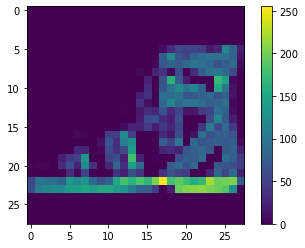

In [20]:
i=9876

print("label predit : ",np.argmax(j[i]))
print("label name predit : ",class_names[np.argmax(j[i])])
print("label : ",test_labels[i])
print("label name : ",class_names[test_labels[i]])
plt.figure()
plt.imshow(test_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
Systeme à ameliorer V2 disponible

label predit :  4
label name predit :  Coat
label :  2
label name :  Pullover


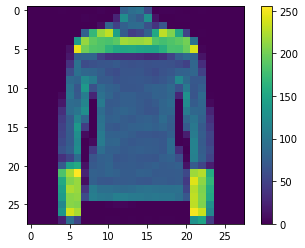

In [21]:
i=4847

print("label predit : ",np.argmax(j[i]))
print("label name predit : ",class_names[np.argmax(j[i])])
print("label : ",test_labels[i])
print("label name : ",class_names[test_labels[i]])
plt.figure()
plt.imshow(test_images[i])
plt.colorbar()
plt.grid(False)
plt.show()